In [ ]:
#기본 라이브러리 만들기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import warnings
warnings.filterwarnings('ignore')

# 실습 1) Decision Tree : iris 데이터



참고문헌: <br>
1) <파이썬 머신러닝 완벽 가이드> 4장 <br>
2) 7기 김원님 코딩 실습 자료 

장점: 직관적으로 이해하기 쉽다, 스케일링 같은 전처리 작업 등이 필요 없다, 시각적으로 표현하기 쉽다 <br>
단점: 과적합되기 쉽다 > 이를 극복하기 위해 트리의 크기를 사전에 제한하는 튜닝 필요

**결정트리 만들기: DecisionTreeClassifier 함수 이용** <br>

호출 방법: *from sklearn.tree import DecisionTreeClassifier*

DecisionTreeClassifier 함수의 (하이퍼) 파라미터: <br>
- min_samples_split : 노드를 분할하기 위한 최소한의 샘플 데이터 수, <br>
  디폴트는 2이고 작게 설정할 수록 분할되는 노드가 많아져서 과적합 가능성 증가 <br>

- min_samples_leaf : 말단 노드가 되기 위한 최소한의 샘플 데이터 수

- max_features : 최적의 분할을 위해 고려할 최대 피처 개수. <br>
디폴트는 None으로 데이터 세트의 모든 피처를 사용해 분할 수행 <br>

- max_depth : 트리의 최대 깊이를 규정 <br>
디폴트는 None으로, 완벽하게 클래스 결정 값이 될 때까지 깊이를 계속 키우며 분할 <br>
적절하게 깊이를 제한해야 과적합을 방지할 수 있음

- max_leaf_nodes : 말단 노드의 최대 개수 <br>

iris.svg

### 데이터셋 불러오기

In [ ]:
#datasets 모듈에서 내장된 데이터셋 load_iris 호출 : 붓꽃 데이터셋
from sklearn.datasets import load_iris
iris = load_iris()

In [ ]:
iris

In [ ]:
#데이터(독립변수)는 iris.data에 저장되어 있음. 앞에 5개만 살펴보자.
iris.data[:5]

In [ ]:
#데이터(종속변수)는 iris.target에 저장되어 있음. 앞에 5개만 살펴보자.
iris.target

In [ ]:
#컬럼명은 iris.feature_names에 저장되어 있음.
iris.feature_names

In [ ]:
#레이블 이름은 iris.target_names에 저장되어 있음 (y의 0, 1, 2가 각각 setosa, versicolor, virginica를 의미)
iris.target_names

In [ ]:
#이를 보기 좋게 파악하기 위해 데이터프레임으로 만들면 (선택사항임, 필수X)
iris_df = pd.DataFrame(data = iris.data, columns = iris.feature_names)
iris_df["Target"] = iris.target #"Target" 열에 종속변수 데이터 추가
iris_df

In [ ]:
#간단하게 데이터 살펴보기 (선택사항임, 필수X)
iris_df.info()

### 훈련 세트와 테스트 세트 분리

In [ ]:
#model_selection 모듈에서 훈련 세트와 테스트 세트를 분리시켜주는 train_test_split 함수 호출
from sklearn.model_selection import train_test_split

#8 대 2의 비율로 훈련 세트와 테스트 세트 분리
train_X, test_X, train_y, test_y = train_test_split(iris.data, iris.target,
                                                    test_size = 0.2, random_state = 1, 
                                                    stratify=iris.target) 
#stratify = iris.target: 0, 1, 2값이 균등하게 나누어질 수 있도록 조정 (분류 문제에서 자주 사용)

In [ ]:
#train_y에서 0, 1, 2의 비율
print(len(train_y[train_y == 0]) / len(train_y))
print(len(train_y[train_y == 1]) / len(train_y))
print(len(train_y[train_y == 2]) / len(train_y))

In [ ]:
#test_y에서 0, 1, 2의 비율
print(len(test_y[test_y == 0]) / len(test_y))
print(len(test_y[test_y == 1]) / len(test_y))
print(len(test_y[test_y == 2]) / len(test_y))

In [ ]:
#확인
train_X[:5]

### Decision Tree 모델 구현

해당 데이터는 결측치가 없습니다 > 결측치 처리 불필요 <br>
Decision Tree는 스케일링 작업 X > 스케일링 불필요

따라서, 바로 모델 구현에 들어가겠습니다.


In [ ]:
#tree 모듈에서 Decision Tree 함수 호출
from sklearn.tree import DecisionTreeClassifier

tree1 = DecisionTreeClassifier() #모델 객체 생성
tree1.fit(train_X, train_y) #모델 훈련

In [ ]:
#앞의 데이터 10개를 예측해보자
tree1.predict(test_X[:10])

In [ ]:
#실제값
test_y[:10]

### 시각화

graphviz 패키지: 결정 트리 알고리즘이 어떠한 규칙을 갖고 트리를 생성하는지 시각적으로 보여줄 수 있음 <br>
사이킷런은 이러한 graphviz 패키지와 쉽게 인터페이스할 수 있도록 export_graphviz() API를 제공

In [ ]:
#export_graphviz 함수: graphviz 패키지를 불러와 시각화하기 위한 파일을 만든다
from sklearn.tree import export_graphviz
#export_graphviz 함수 그 자체가 시각화해주는 함수는 아님

#export_graphviz()의 호출 결과로 out_file로 파일을 생성함
export_graphviz(tree1, #모델의 이름
                out_file = "tree.dot", #파일을 tree.dot이라는 이름으로 생성하겠다
                class_names = iris.target_names,
                feature_names = iris.feature_names,
                impurity = True, # impurity = True: 분순도를 표기 (True가 디폴트)
                filled = True) # filled = True: 색깔을 추가 (False가 디폴트) 
                # 이 경우는 3개의 클래스가 주황, 초록, 보라색으로 표시됨
                # 색깔이 진할 수록 지니계수가 낮고 해당 레이블에 속하는 샘플 데이터가 많다는 뜻

In [ ]:
# 결정트리를 위한 시각화 패키지
import graphviz

#tree.dot 파일 열기 / 읽기
with open("tree.dot") as f:
  dot_graph = f.read()

#시각화
graphviz.Source(dot_graph)

### 성능평가

In [ ]:
#test_X의 예측값을 pred_y에 넣어주겠다.
pred_y = tree1.predict(test_X)
pred_y

In [ ]:
#accuracy_score
from sklearn.metrics import accuracy_score
print("Accuracy : {:.3f}".format(accuracy_score(test_y, pred_y)))

In [ ]:
from sklearn.metrics import classification_report

# 다양한 평가지표
print(classification_report(test_y, pred_y, digits=3))

참고) https://blog.naver.com/PostView.naver?blogId=hannaurora&logNo=222498671200&parentCategoryNo=&categoryNo=41&viewDate=&isShowPopularPosts=true&from=search

### 하이퍼 파라미터 조정해보기

DecisionTreeClassifier 함수의 (하이퍼) 파라미터: <br>
- min_samples_split : 노드를 분할하기 위한 최소한의 샘플 데이터 수, <br>
  디폴트는 2이고 작게 설정할 수록 분할되는 노드가 많아져서 과적합 가능성 증가 <br>

- min_samples_leaf : 말단 노드가 되기 위한 최소한의 샘플 데이터 수

- max_features : 최적의 분할을 위해 고려할 최대 피처 개수. <br>
디폴트는 None으로 데이터 세트의 모든 피처를 사용해 분할 수행 <br>

- max_depth : 트리의 최대 깊이를 규정 <br>
디폴트는 None으로, 완벽하게 클래스 결정 값이 될 때까지 깊이를 계속 키우며 분할 <br>
적절하게 깊이를 제한해야 과적합을 방지할 수 있음

- max_leaf_nodes : 말단 노드의 최대 개수 <br>

#### min_sample_split = 5

In [ ]:
#max_depth를 3으로 설정해보자!
from sklearn.tree import DecisionTreeClassifier

tree2 = DecisionTreeClassifier(min_samples_split = 5) #모델 객체 생성
tree2.fit(train_X, train_y) #모델 훈련

In [ ]:
#export_graphviz 함수: graphviz 패키지를 불러와 시각화하기 위한 파일을 만든다
from sklearn.tree import export_graphviz
#export_graphviz 함수 그 자체가 시각화해주는 함수는 아님

#export_graphviz()의 호출 결과로 out_file로 파일을 생성함
export_graphviz(tree2, #모델의 이름
                out_file = "tree2.dot", #파일을 tree2.dot이라는 이름으로 생성하겠다
                class_names = iris.target_names,
                feature_names = iris.feature_names,
                impurity = True, # impurity = True: 분순도를 표기 (True가 디폴트)
                filled = True) # filled = True: 색깔을 추가 (False가 디폴트) 
                # 이 경우는 3개의 클래스가 주황, 초록, 보라색으로 표시됨
                # 색깔이 진할 수록 지니계수가 낮고 해당 레이블에 속하는 샘플 데이터가 많다는 뜻

In [ ]:
# 결정트리를 위한 시각화 패키지
import graphviz

#tree2.dot 파일 열기 / 읽기
with open("tree2.dot") as f:
  dot_graph = f.read()

#시각화
graphviz.Source(dot_graph)

#### max_depth = 3

In [ ]:
#max_depth를 3으로 설정해보자!
from sklearn.tree import DecisionTreeClassifier

tree3 = DecisionTreeClassifier(max_depth = 3) #모델 객체 생성
tree3.fit(train_X, train_y) #모델 훈련

In [ ]:
#export_graphviz 함수: graphviz 패키지를 불러와 시각화하기 위한 파일을 만든다
from sklearn.tree import export_graphviz
#export_graphviz 함수 그 자체가 시각화해주는 함수는 아님

#export_graphviz()의 호출 결과로 out_file로 파일을 생성함
export_graphviz(tree3, #모델의 이름
                out_file = "tree3.dot", #파일을 tree3.dot이라는 이름으로 생성하겠다
                class_names = iris.target_names,
                feature_names = iris.feature_names,
                impurity = True, # impurity = True: 분순도를 표기 (True가 디폴트)
                filled = True) # filled = True: 색깔을 추가 (False가 디폴트) 
                # 이 경우는 3개의 클래스가 주황, 초록, 보라색으로 표시됨
                # 색깔이 진할 수록 지니계수가 낮고 해당 레이블에 속하는 샘플 데이터가 많다는 뜻

In [ ]:
# 결정트리를 위한 시각화 패키지
import graphviz

#tree3.dot 파일 열기 / 읽기
with open("tree3.dot") as f:
  dot_graph = f.read()

#시각화
graphviz.Source(dot_graph)

In [ ]:
#accuracy_score
from sklearn.metrics import accuracy_score
print("Accuracy (min_samples_split = 5): {:.3f}".format(accuracy_score(test_y, tree2.predict(test_X))))
print("Accuracy (max_depth = 3): {:.3f}".format(accuracy_score(test_y, tree3.predict(test_X))))

# 실습 2) Decision Tree : Personal Loan 데이터

**필독) 사전에 구글 드라이브에 Personal Loan.csv 파일을 업로드 해주세요!**

### 데이터 불러오기

In [ ]:
#Personal Loan.csv 파일 불러오기
loan = pd.read_csv('/content/drive/MyDrive/DSL/Personal Loan.csv')
loan.head()

In [ ]:
#데이터 간단하게 살펴보기
loan.info()

여기서 ZIP Code, ID 열은 분석의 편의를 위해 빼도록 하겠다.

또 데이터들을 각각 raw_X, raw_y에 담아주도록 하자.

In [ ]:
raw_X = loan.dropna().drop(['Personal Loan', 'ZIP Code', 'ID'], axis=1) #종속변수 Personal Loan 및 ZIP Code, ID 열 빼기
raw_X.head()

In [ ]:
raw_y = loan['Personal Loan']
raw_y.value_counts() # 이진분류(0,1) 문제

### 범주형 데이터 전처리 (원-핫 인코딩)

Education 열의 경우, 숫자로 되어있지만 범주형 데이터이다. <br>
원-핫 인코딩을 이용해 전처리를 해보도록 하자.

In [ ]:
# 연속형이 아니라 범주형인 'Education'열을 One-hot Encoding으로 전처리
raw_X_one_hot = pd.get_dummies(data=raw_X, columns=['Education'], prefix='Education')
raw_X_one_hot.head()

### 훈련 세트와 테스트 세트 분리

In [ ]:
#stratify = raw_y에 주목
#raw_X_one_hot, raw_y를 넣어주었음
train_X, test_X, train_y, test_y = train_test_split(raw_X_one_hot, raw_y, train_size=0.7, test_size=0.3, random_state=1, stratify=raw_y)
print(train_X.shape, test_X.shape, train_y.shape, test_y.shape)

In [ ]:
raw_y.value_counts() 
# 0의 비율: 0.8976
# 1의 비율: 0.1024

In [ ]:
test_y.value_counts()
# 0의 비율: 0.8973
# 1의 비율: 0.1027

In [ ]:
train_y.value_counts()
# 0의 비율: 0.8977
# 1의 비율: 0.1023

### Decision Tree 모델 구현

In [ ]:
from sklearn.tree import DecisionTreeClassifier

loan_tree = DecisionTreeClassifier()
loan_tree.fit(train_X, train_y)

### 시각화

In [ ]:
#export_graphviz 함수: graphviz 패키지를 불러와 시각화하기 위한 파일을 만든다
from sklearn.tree import export_graphviz

#export_graphviz()의 호출 결과로 out_file로 파일을 생성함
export_graphviz(loan_tree, #모델의 이름
                out_file = "loan_tree.dot",
                feature_names = train_X.columns,
                impurity = True, # impurity = True: 분순도를 표기 (True가 디폴트)
                filled = True) # filled = True: 색깔을 추가 (False가 디폴트) 

In [ ]:
# 결정트리를 위한 시각화 패키지
import graphviz

#loan_tree 파일 열기 / 읽기
with open("loan_tree.dot") as f:
  dot_graph = f.read()

#시각화
graphviz.Source(dot_graph)

### 성능평가

In [ ]:
from sklearn.metrics import accuracy_score, f1_score

print("Decision Tree Accuracy for test data : {:.3f}".format(accuracy_score(test_y, loan_tree.predict(test_X))))
print("Decision Tree F1 score for test data : {:.3f}".format(f1_score(test_y, loan_tree.predict(test_X))))

### 최적의 하이퍼 파라미터 찾기 : 그리드 서치

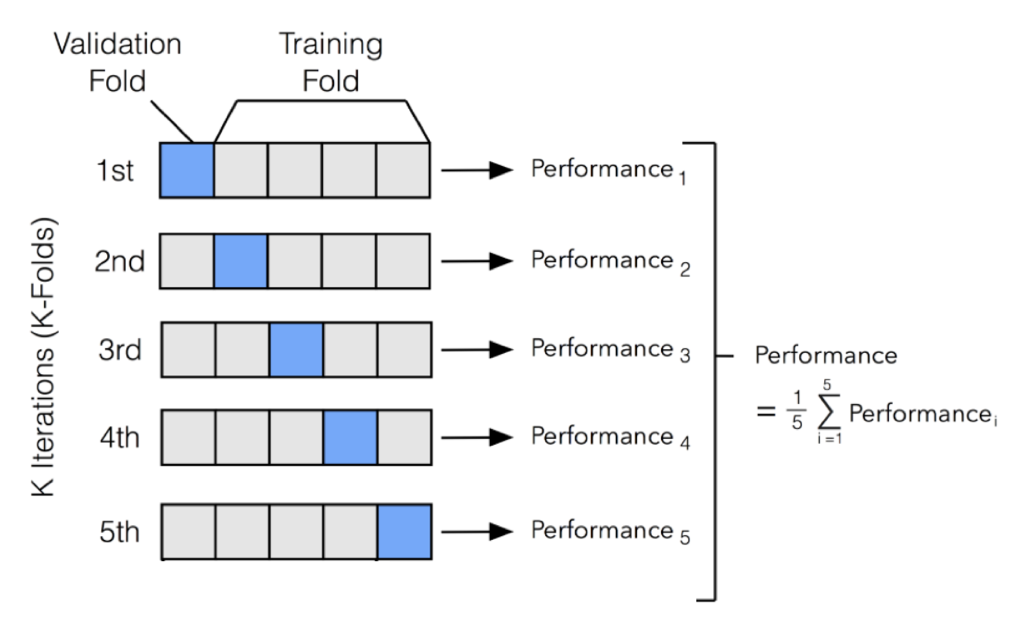

Gridsearch: 관심 있는 매개변수들을 대상으로 가능한 모든 조합을 시도하여 최적의 매개변수를 찾는 방법. <br> 즉, 우리에게 필요한 최적의 하이퍼 파라미터를 찾아준다 <br>
ex) max_depth를 몇으로 설정하는게 좋은지 등등 <br>

GridSearch는 확인하고 싶은 다양한 파라미터값을 넣어주면,
그것들을 하나씩 확인하면서 스코어를 내고, <br>
가장 좋은 성능의 모델에 대한 결과를 확인하고 사용할 수 있음

model_selection 모듈의 GridSearchCV 함수는 GridSearch + Cross validation의 약어로, <br>
k개의 폴드에 대해 최적의 하이퍼 파라미터를 모두 종합적으로 고려하여 최적의 파라미터를 출력한다. <br> 이때, 테스트하고자 하는 파라미터 값들을 사전(dictionary) 타입으로 정의해주어야 한다.

max_depth, min_samples_split에 대한 hyperparameter tuning을 실습해보자.

In [ ]:
from sklearn.model_selection import GridSearchCV # 관심 있는 매개변수들을 대상으로 가능한 모든 조합을 시도하여 최적의 매개변수를 찾는 방법

# 테스트하고자 하는 파라미터 값들을 사전타입으로 정의
# max_depth 와 min_samples_split라는 parameter에 대해 범위 지정
hyperparamters = {'max_depth': list(range(2, 8)),  'min_samples_split': list(range(2, 20))}

# GridSearch 진행
GridCV = GridSearchCV(estimator=loan_tree, param_grid=hyperparamters, cv=5)
GridCV.fit(train_X, train_y)

In [ ]:
GridCV.best_params_ # 가장 좋은 성능을 보였을 때의 parameter

In [ ]:
GridCV.best_score_ #위 파라미터로 했을 때 성능(평균 정확도)

In [ ]:
#위 파라미터 값들로 모델을 훈련시켜보자!
loan_tree_new = DecisionTreeClassifier(max_depth=5, min_samples_split=9, random_state=0).fit(train_X, train_y)

In [ ]:
#원래의 트리 성능
from sklearn.metrics import accuracy_score, f1_score

print("Decision Tree Accuracy for test data : {:.3f}".format(accuracy_score(test_y, loan_tree.predict(test_X))))
print("Decision Tree F1 score for test data : {:.3f}".format(f1_score(test_y, loan_tree.predict(test_X))))

In [ ]:
#새로운 트리 성능
from sklearn.metrics import accuracy_score, f1_score

print("Decision Tree Accuracy for test data : {:.3f}".format(accuracy_score(test_y, loan_tree_new.predict(test_X))))
print("Decision Tree F1 score for test data : {:.3f}".format(f1_score(test_y, loan_tree_new.predict(test_X))))

GridSearchCV로 최적의 하이퍼 파라미터를 찾았다. 성능이 보다 좋아진 것을 확인할 수 있다

# 실습 3) Voting Classifier : 유방암 데이터

### 데이터 불러오기

In [ ]:
#사이킷런 내장 데이터인 유방암 데이터 가져오기 
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [ ]:
cancer.target #예측해야 되는 값: 0 또는 1

### 훈련 세트와 테스트 세트 분리

In [ ]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(cancer.data, cancer.target,
                                                    test_size = 0.2, random_state = 1)

### Voting Classifier 모델 만들기

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

#개별 모델은 로지스틱 회귀와 Decision Tree
model1 = LogisticRegression()
model2 = DecisionTreeClassifier()

In [ ]:
#VotingClassifier
from sklearn.ensemble import VotingClassifier
voting = VotingClassifier(estimators = [('LR', model1), ('DT', model2)], voting = 'soft')

In [ ]:
#VotingClassifier 학습/예측/평가
voting.fit(train_X, train_y)

In [ ]:
from sklearn.metrics import accuracy_score, f1_score
print("Voting Classifier Accuracy for test data : {:.4f}".format(accuracy_score(test_y, voting.predict(test_X))))

In [ ]:
#개별 모델의 학습 / 예측 평가
classifiers = [model1, model2]
for i in classifiers:
  i.fit(train_X, train_y)
  pred = i.predict(test_X)
  class_name = i.__class__.__name__
  print('{0} accuracy: {1: .4f}'.format(class_name, accuracy_score(test_y, pred)))

# 실습 4) Random Forest : 유방암 데이터

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(train_X, train_y)
pred = rf.predict(test_X)
print("Random Forest Classifier Accuracy for test data : {:.4f}".format(accuracy_score(test_y, pred)))

### 그리드 서치

In [ ]:
from sklearn.model_selection import GridSearchCV

params = {'max_depth': [5, 10, 15, 20]}

rf_new = RandomForestClassifier(n_estimators = 100)
GridCV = GridSearchCV(rf_new, param_grid = params, cv = 5, n_jobs = -1)
GridCV.fit(train_X, train_y)

print("최적의 파라미터: ", GridCV.best_params_)
print('최고 예측 정확도: ', GridCV.best_score_)

In [ ]:
rf_new = RandomForestClassifier(max_depth = 20)
rf_new.fit(train_X, train_y)
pred = rf_new.predict(test_X)
print("Random Forest Classifier(New) Accuracy for test data : {:.4f}".format(accuracy_score(test_y, pred)))

#실습 5) Gradient Boost Classifier : 유방암 데이터

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gb_clf = GradientBoostingClassifier()
gb_clf.fit(train_X, train_y)
gb_pred = gb_clf.predict(test_X)
gb_acc = accuracy_score(test_y, gb_pred)

print(f"모델 정확도 : {gb_acc :.4f}")